In [38]:
import pandas as pd
import matplotlib.pyplot as plt
bank = pd.read_csv('bank-full.csv', delimiter=';')

In [81]:
#1 - O trabalhador blue-collar é aquele que mais tem tendência a pegar empréstimo pra habitação. Isso pode ser visto no gráfico de barras entitulado 
#'Empréstimo habitacional' e no dataframe df_housing. No gráfico pode ser visto que a maioria dos trabalhadora blue-collar pedem empréstimo habitacional
#(variável job_sim, em azul). No dataframe a diferença fica clra, quando podemos ver que aproximadamente 72% dos trabalhadores blue-collar pedem 
#empréstimo habitacional

C:\Users\Rafael.Menezes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


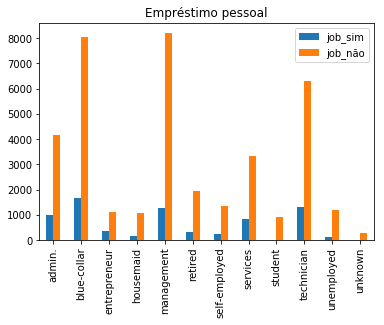

In [338]:
Sim_loan = bank[bank.loan=='yes']
df_sim_loan = pd.DataFrame(Sim_loan['job'].value_counts())
Não_loan = bank[bank.loan=='no']
df_não_loan = pd.DataFrame(Não_loan['job'].value_counts())
df_loan = pd.concat([df_sim_loan, df_não_loan], axis = 1)
df_loan.columns = ['job_sim','job_não']
df_loan['total'] = df_loan.job_sim+df_loan.job_não
df_loan['job_sim%'] = df_loan.job_sim/df_loan.total
df_loan['job_não%'] = df_loan.job_não/df_loan.total
df_plot_loan = df_loan[['job_sim','job_não']]
df_plot_loan.plot.bar(title='Empréstimo pessoal')

C:\Users\Rafael.Menezes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


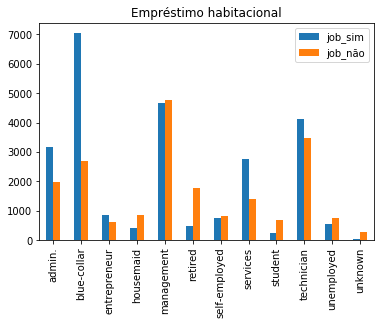

In [340]:
Sim_housing = bank[bank.housing=='yes']
df_sim_housing = pd.DataFrame(Sim_housing['job'].value_counts())
Não_housing = bank[bank.housing=='no']
df_não_housing = pd.DataFrame(Não_housing['job'].value_counts())
df_housing = pd.concat([df_sim_housing, df_não_housing], axis = 1)
df_housing.columns = ['job_sim','job_não']
df_plot = df_housing
df_housing['total'] = df_housing.job_sim+df_housing.job_não
df_housing['job_sim%'] = df_housing.job_sim/df_housing.total
df_housing['job_não%'] = df_housing.job_não/df_housing.total
df_plot = df_housing[['job_sim','job_não']]
df_plot.plot.bar(title='Empréstimo habitacional')

In [342]:
df_housing

,job_sim,job_não,total,job_sim%,job_não%
admin.,3182,1989,5171,0.615355,0.384645
blue-collar,7048,2684,9732,0.724209,0.275791
entrepreneur,869,618,1487,0.584398,0.415602
housemaid,398,842,1240,0.320968,0.679032
management,4678,4780,9458,0.494608,0.505392
retired,491,1773,2264,0.216873,0.783127
self-employed,765,814,1579,0.484484,0.515516
services,2766,1388,4154,0.665864,0.334136
student,249,689,938,0.265458,0.734542
technician,4115,3482,7597,0.541661,0.458339


In [115]:
#2 - A porcentagem de pessoas que já tiveran contato antes entre os de resposta yes é mais do que o dobro entre as de respostas não

In [113]:
bank_sim = bank[(bank.y=='yes')]
bank_sim_pdays = bank_sim[(bank_sim.pdays!=-1)]
bank_sim_pdays.shape[0]/bank_sim.shape[0]

0.3601815087918321

In [114]:
bank_não = bank[(bank.y=='no')]
bank_não_pdays = bank_não[(bank_não.pdays!=-1)]
bank_não_pdays.shape[0]/bank_não.shape[0]

0.15911026501678271

In [359]:
#2 - Em termos de porcentagem, quem recebeu o primeiro contato aderiu aproximadamente 15% a menos à campanha  
display(bank[bank.pdays==-1]['y'].value_counts()/bank[bank.pdays==-1]['y'].value_counts().sum())
display(bank[bank.pdays!=-1]['y'].value_counts()/bank[bank.pdays!=-1]['y'].value_counts().sum())

no     0.908427
yes    0.091573
Name: y, dtype: float64

no     0.769287
yes    0.230713
Name: y, dtype: float64

In [343]:
#2 - As pessoas que fizeram o depósito (variável y) e estão no segundo (ou superior) contato demoraram mais, em média, ao telefone do que aquelas que não compraram 
#e estão no segundo contato. Isso nos leva a crer que o tempo que o tempo que a atendente (pessoa que ligou pro cliente) passou conversando com o cliente
#pode ter influenciado na decisão
display(bank_sim_pdays.duration.mean())
display(bank_não_pdays.duration.mean())

In [369]:
#As pessoas que não compraram receberam, em média, mais contatos nessa campanha
display(bank_sim_pdays.campaign.mean())
display(bank_não_pdays.campaign.mean())
#Quem recebeu mais de um contato nessa campanha comprou 5% menos do que os que receberam apenas um contato.
display(bank[bank.campaign>1].y.value_counts()/bank[bank.campaign>1].y.value_counts().sum())
display(bank[bank.campaign==1].y.value_counts()/bank[bank.campaign==1].y.value_counts().sum())

no     0.901399
yes    0.098601
Name: y, dtype: float64

no     0.854024
yes    0.145976
Name: y, dtype: float64

In [136]:
#3 1.78 e 11. Esses números foram calculados de maneira muito simples. Talvez algo mais aprofundado desse números melhores.
bank_sim_pdays.campaign.max()
bank_sim_pdays.campaign.mean()

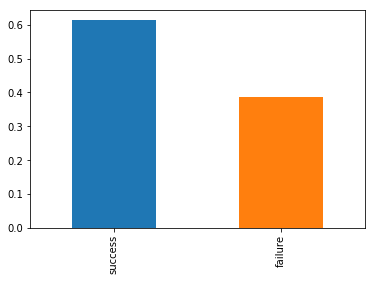

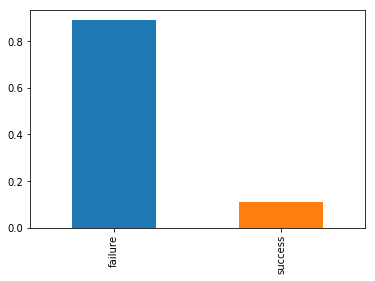

In [372]:
#4- sim. Percebe-se que, o resultado da campanha anterior influencia na campanha atual.
#Considerando apenas os cliente que se sabe que tiveram sucesso ou falha (desconsiderando unknown e outros):
#dentre os que tiveram sucesso nessa campanha, os que tiveram sucesso anterior é maioria.
bank_poutcome_yes = bank_sim[(bank_sim.poutcome=='success') | (bank_sim.poutcome=='failure')]
bank_poutcome_yes = bank_poutcome_yes.poutcome.value_counts()
total = bank_poutcome_yes.sum()
bank_poutcome_yes = bank_poutcome_yes/total
bank_poutcome_yes.plot.bar()
plt.show()
#O mesmo acontece dentre os que tiveram fracasso. Ou seja,  
#Dentre os que tiveram fracasso nessa campanha, os que tiveram fracasso anterior é maioria
bank_poutcome_no = bank_não[(bank_não.poutcome=='success') | (bank_não.poutcome=='failure')]
bank_poutcome_no = bank_poutcome_no.poutcome.value_counts()
total = bank_poutcome_no.sum()
bank_poutcome_no = bank_poutcome_no/total
bank_poutcome_no.plot.bar()
plt.show()


In [217]:
#6 Na questão 6, apesar de o pedido ter sido relacionado a quem fez o empréstimo imobiliário, foram mostrados dados de quem não fez o emprésimo
#pra comparação. Se o comportamento fosse igual nas duas situações, ele não poderia ser considerado proeminente em uma delas.
#Dentre os que pediram empréstimo imobiliário, mais de 90% não depositou (sucesso na campanha)
(Sim_housing['y'].value_counts()/Sim_housing['y'].value_counts().sum()).plot.bar()
# Enquanto dentre os que não tiveram empréstimo, 'apenas' 80% fez o depósivo
(Não_housing['y'].value_counts()/Não_housing['y'].value_counts().sum()).plot.bar()

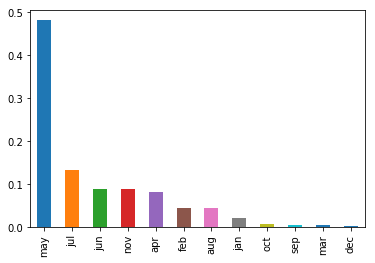

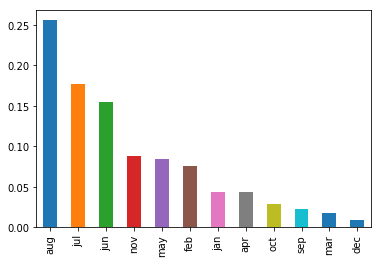

In [374]:
#6
#Dentre os que pediram empréstimo imobiliário, quase 50% teve último contato em maio
(Sim_housing['month'].value_counts()/Sim_housing['month'].value_counts().sum()).plot.bar(title='Com empréstimo imobiliário')
plt.show()
# Enquanto dentre os que não tiveram empréstimo, quase 50% teve o último contato em agosto
(Não_housing['month'].value_counts()/Não_housing['month'].value_counts().sum()).plot.bar('Sem empréstimo imobiliário')
plt.show()

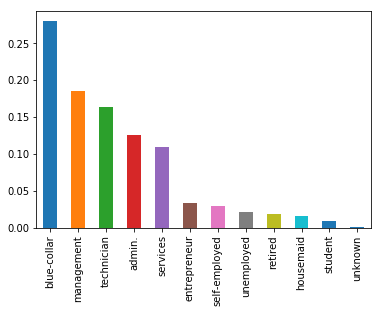

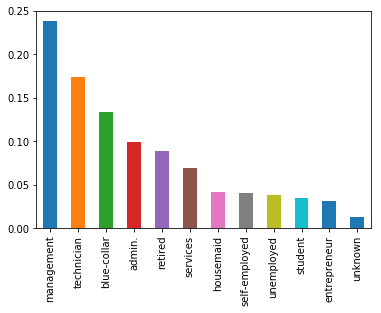

In [375]:
#6
#Dentre os que pediram empréstimo imobiliário, quase 30% é trabalhador blue-collar (profissão com maior percentual)
(Sim_housing['job'].value_counts()/Sim_housing['job'].value_counts().sum()).plot.bar()
plt.show()
# Enquanto dentre os que não tiveram empréstimo, quase 30% é gerente (profissão com maior percentual)
(Não_housing['job'].value_counts()/Não_housing['job'].value_counts().sum()).plot.bar()
plt.show()


In [385]:
#6
#Dentre aqueles que pediram empréstimo imobiliário existe uma pessoa que recebeu 275 contatos antes dessa campanha.
Sim_housing.previous.plot.box(title='Boxplot dos clientes com empréstimo imobiliários com outlier')
plt.show()
Sim_housing[Sim_housing.previous<275].previous.plot.box(title='Boxplot com empréstimo imobiliários sem outlier')
plt.show()
Não_housing.previous.plot.box(title='Boxplot sem empréstimo imobiliários')
plt.show()

In [389]:
#6
#Percebe-se que, mesmo sem o outlier, a média de contatos recebidos dentre aqueles com empréstimo imobiliário é maior.
#Isso pode ser confirmado através dos cálculos mostrados abaixo
display(Sim_housing.previous.mean())
display(Não_housing.previous.mean())

0.6566653402307998

0.4847866142124396

In [378]:
#6
#Dentre os que tem empréstimo imobiliário, aproximadamente 8% fez o depósito 
display(Sim_housing[Sim_housing.y=='yes'].shape[0]/Sim_housing.shape[0])
display(Sim_housing[Sim_housing.y=='no'].shape[0]/Sim_housing.shape[0])
#Dentre os que não tem empréstimo imobiliário, aproximadamente 17% fez o depósito 
display(Não_housing[Não_housing.y=='yes'].shape[0]/Não_housing.shape[0])
display(Não_housing[Não_housing.y=='no'].shape[0]/Não_housing.shape[0])

0.07699960206923995

0.92300039793076

0.1670235546038544

0.8329764453961456

In [320]:
#6 - Umas das formas de se testar a importância das variáveis é criando um modelo e estudando o mod
Aplicando-se uma árvore de decisão, se percebe que dentre os que pediram empréstimo imobiliário, a duração das ligações parece ter uma influência
#considerável no momento de se decidir se vai comprar o produto. Dentre os que não pediram empréstimo imobiliário a influência existe, mas é quase 10% menor

Feature ranking:


'1. feature duration (0.334294)'

'2. feature balance (0.090518)'

'3. feature day (0.090442)'

'4. feature age (0.078923)'

'5. feature poutcome_success (0.070181)'

'6. feature campaign (0.039452)'

'7. feature pdays (0.039338)'

'8. feature previous (0.018660)'

'9. feature month_may (0.014275)'

'10. feature contact_unknown (0.013778)'

'11. feature month_apr (0.011166)'

'12. feature month_aug (0.011065)'

'13. feature month_mar (0.010580)'

'14. feature marital_single (0.010339)'

'15. feature marital_married (0.009717)'

'16. feature month_jun (0.009647)'

'17. feature job_blue-collar (0.009479)'

'18. feature education_primary (0.008837)'

'19. feature job_technician (0.008748)'

'20. feature education_tertiary (0.008399)'

'21. feature education_secondary (0.008146)'

'22. feature marital_divorced (0.007344)'

'23. feature month_oct (0.007157)'

'24. feature poutcome_other (0.006194)'

'25. feature job_admin. (0.006086)'

'26. feature loan_yes (0.006047)'

'27. feature job_services (0.005418)'

'28. feature month_feb (0.005312)'

'29. feature contact_cellular (0.004770)'

'30. feature month_sep (0.004498)'

'31. feature month_jul (0.004480)'

'32. feature poutcome_failure (0.004465)'

'33. feature job_entrepreneur (0.004357)'

'34. feature loan_no (0.004016)'

'35. feature job_management (0.003724)'

'36. feature job_self-employed (0.003597)'

'37. feature month_nov (0.003423)'

'38. feature job_retired (0.003422)'

'39. feature education_unknown (0.003258)'

'40. feature month_dec (0.003087)'

'41. feature month_jan (0.002960)'

'42. feature poutcome_unknown (0.002782)'

'43. feature default_no (0.002394)'

'44. feature job_housemaid (0.001525)'

'45. feature job_unemployed (0.001245)'

'46. feature job_student (0.000951)'

'47. feature job_unknown (0.000713)'

'48. feature default_yes (0.000447)'

'49. feature contact_telephone (0.000345)'

'50. feature housing_yes (0.000000)'

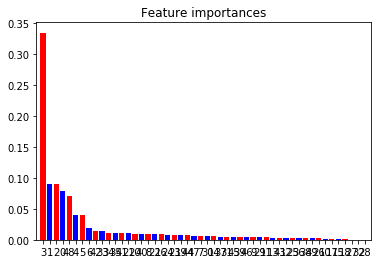

In [420]:
Numéricos = Sim_housing[['age','balance','day','duration','campaign','pdays','previous']]
Categóricos = Sim_housing[['job','marital','education','default','housing','loan','contact','month','poutcome']]
Categóricos = pd.get_dummies(Categóricos)
X = pd.concat([Numéricos, Categóricos], axis = 1)
y = Sim_housing.y
#Cria a árvore de decisão e calcula a curácia
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    display("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=['red','blue'], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:


'1. feature duration (0.243483)'

'2. feature poutcome_success (0.117967)'

'3. feature balance (0.106220)'

'4. feature age (0.096167)'

'5. feature day (0.089739)'

'6. feature pdays (0.034755)'

'7. feature campaign (0.034195)'

'8. feature month_apr (0.019882)'

'9. feature contact_unknown (0.017371)'

'10. feature month_mar (0.017087)'

'11. feature month_feb (0.012545)'

'12. feature education_tertiary (0.012159)'

'13. feature previous (0.011690)'

'14. feature month_jun (0.011460)'

'15. feature month_oct (0.010558)'

'16. feature job_management (0.010146)'

'17. feature job_technician (0.009155)'

'18. feature marital_married (0.008210)'

'19. feature month_aug (0.008015)'

'20. feature job_blue-collar (0.007904)'

'21. feature month_may (0.007817)'

'22. feature contact_cellular (0.007548)'

'23. feature month_sep (0.007459)'

'24. feature job_unemployed (0.007444)'

'25. feature marital_divorced (0.007225)'

'26. feature education_unknown (0.006522)'

'27. feature month_nov (0.006476)'

'28. feature education_secondary (0.006039)'

'29. feature month_jul (0.005999)'

'30. feature job_retired (0.005352)'

'31. feature job_admin. (0.005348)'

'32. feature contact_telephone (0.004926)'

'33. feature job_services (0.004733)'

'34. feature loan_no (0.004365)'

'35. feature education_primary (0.003979)'

'36. feature job_self-employed (0.003891)'

'37. feature job_housemaid (0.003654)'

'38. feature marital_single (0.003409)'

'39. feature job_entrepreneur (0.003232)'

'40. feature job_student (0.002906)'

'41. feature month_jan (0.002902)'

'42. feature month_dec (0.002553)'

'43. feature poutcome_failure (0.002409)'

'44. feature poutcome_other (0.002266)'

'45. feature loan_yes (0.000992)'

'46. feature job_unknown (0.000914)'

'47. feature default_yes (0.000620)'

'48. feature default_no (0.000185)'

'49. feature poutcome_unknown (0.000127)'

'50. feature housing_no (0.000000)'

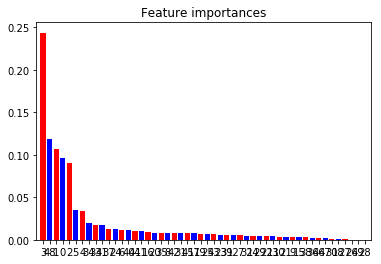

In [322]:
Numéricos = Não_housing[['age','balance','day','duration','campaign','pdays','previous']]
Categóricos = Não_housing[['job','marital','education','default','housing','loan','contact','month','poutcome']]
Categóricos = pd.get_dummies(Categóricos)
X = pd.concat([Numéricos, Categóricos], axis = 1)
y = Não_housing.y
#Cria a árvore de decisão e calcula a curácia
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    display("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=['red','blue'], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [336]:
# 6
#A influência pode ser vista aqui. Inclusive, a diferença entre as média é muito maior quando houve emprésimo imobiliário, 
#como pode ser visto nas árvores (importância de 0.33 quando houve empréstimo e 0.24 quando não houve).
display(Sim_housing[Sim_housing.y=='yes'].duration.mean())
display(Sim_housing[Sim_housing.y=='no'].duration.mean())
display(Não_housing[Não_housing.y=='yes'].duration.mean())
display(Não_housing[Não_housing.y=='no'].duration.mean())